In [2]:
# Import pustaka yang dibutuhkan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Get the filename from the uploaded file dictionary
filename = list(uploaded.keys())[0]

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(filename)

# Display dataset preview and statistics
print("Dataset Preview:")
print(df.head())
print("\nStatistik Dataset:")
print(df.describe())


Saving dataset_150.csv to dataset_150.csv
Dataset Preview:
   usia jenis_kelamin riwayat_keluarga  kekeruhan_lensa  penurunan_ketajaman  \
0    69        Wanita            Tidak              3.6                    8   
1    63        Wanita            Tidak              5.0                    6   
2    71        Wanita            Tidak              0.8                    4   
3    80          Pria            Tidak              8.5                    9   
4    62        Wanita            Tidak              4.4                    6   

   sensitivitas_cahaya perubahan_warna penglihatan_ganda  tekanan_intraokular  \
0                    0              Ya             Tidak                 18.0   
1                    6              Ya             Tidak                 17.5   
2                    0              Ya             Tidak                 21.1   
3                    8           Tidak                Ya                 16.2   
4                    0              Ya             Tida

In [3]:
# Pra-pemrosesan data
# Konversi kolom kategorikal menjadi numerik
df['jenis_kelamin'] = df['jenis_kelamin'].map({'Pria': 1, 'Wanita': 0})
df['riwayat_keluarga'] = df['riwayat_keluarga'].map({'Ya': 1, 'Tidak': 0})
df['perubahan_warna'] = df['perubahan_warna'].map({'Ya': 1, 'Tidak': 0})
df['penglihatan_ganda'] = df['penglihatan_ganda'].map({'Ya': 1, 'Tidak': 0})
df['hasil_slitlamp'] = df['hasil_slitlamp'].map({'Normal': 0, 'Abnormal': 1})
df['katarak'] = df['katarak'].map({'YA': 1, 'TIDAK': 0})

In [4]:
# Menampilkan data setelah konversi
print("Data Setelah Konversi Kolom Kategorikal Menjadi Numerik:")
print(df.head())  # Menampilkan 5 baris pertama data yang sudah dikonversi

Data Setelah Konversi Kolom Kategorikal Menjadi Numerik:
   usia  jenis_kelamin  riwayat_keluarga  kekeruhan_lensa  \
0    69              0                 0              3.6   
1    63              0                 0              5.0   
2    71              0                 0              0.8   
3    80              1                 0              8.5   
4    62              0                 0              4.4   

   penurunan_ketajaman  sensitivitas_cahaya  perubahan_warna  \
0                    8                    0                1   
1                    6                    6                1   
2                    4                    0                1   
3                    9                    8                0   
4                    6                    0                1   

   penglihatan_ganda  tekanan_intraokular  hasil_slitlamp  visus  katarak  
0                  0                 18.0               1   0.13        1  
1                  0                 17

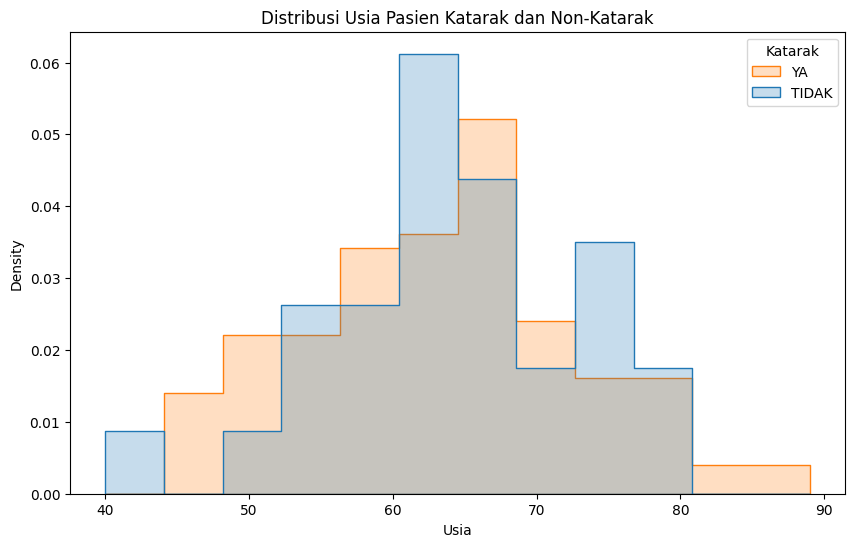

In [15]:
# ANALISA KORELASI DATA

# 1. Distribusi Usia Pasien Katarak dan Non-Katarak
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='usia', hue='katarak', element='step', stat='density', common_norm=False)
plt.title('Distribusi Usia Pasien Katarak dan Non-Katarak')
plt.xlabel('Usia')
plt.ylabel('Density')
plt.legend(title='Katarak', labels=['YA', 'TIDAK'])
plt.show()

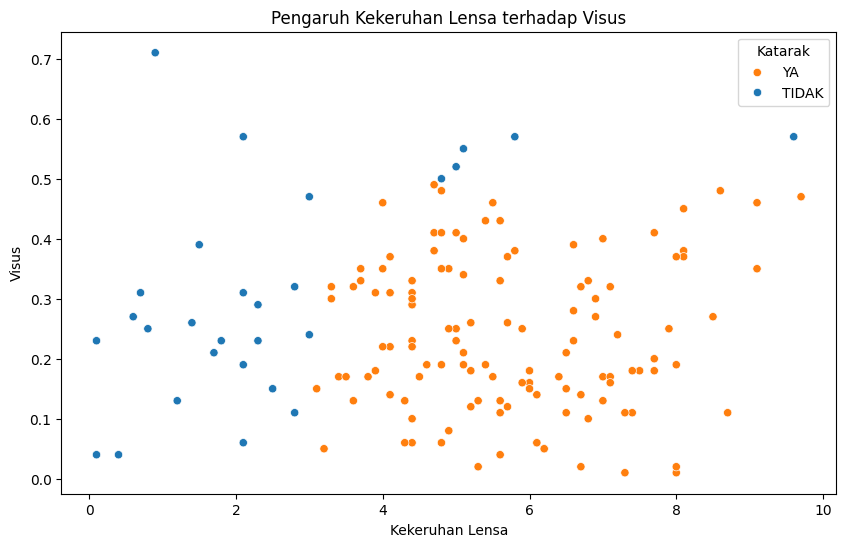

In [10]:
# 2. Pengaruh Kekeruhan Lensa terhadap Visus
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='kekeruhan_lensa', y='visus', hue='katarak')
plt.title('Pengaruh Kekeruhan Lensa terhadap Visus')
plt.xlabel('Kekeruhan Lensa')
plt.ylabel('Visus')

# Mengubah label legenda
plt.legend(title='Katarak', labels=['YA', 'TIDAK'])

plt.show()

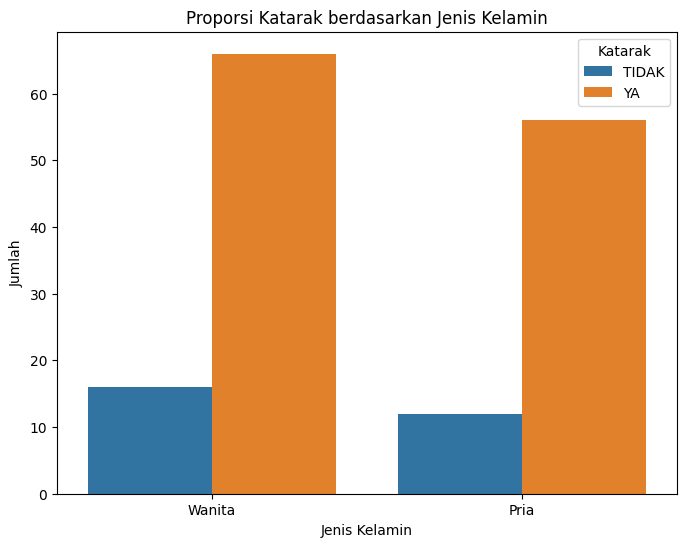

In [16]:
# 3. Proporsi Katarak berdasarkan Jenis Kelamin
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='jenis_kelamin', hue='katarak')
plt.title('Proporsi Katarak berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')

# Mengubah label sumbu x
plt.xticks(ticks=[0, 1], labels=['Wanita', 'Pria'])
# Mengubah label legenda
plt.legend(title='Katarak', labels=['TIDAK', 'YA'])

plt.show()

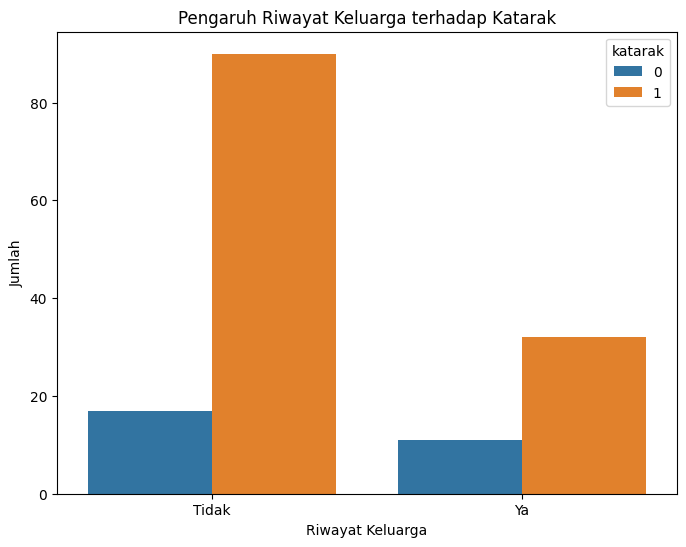

In [20]:
# 4. Pengaruh Riwayat Keluarga terhadap Katarak
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='riwayat_keluarga', hue='katarak')
plt.title('Pengaruh Riwayat Keluarga terhadap Katarak')
plt.xlabel('Riwayat Keluarga')
plt.ylabel('Jumlah')
plt.xticks(ticks=[0, 1], labels=['Tidak', 'Ya'])
plt.show()

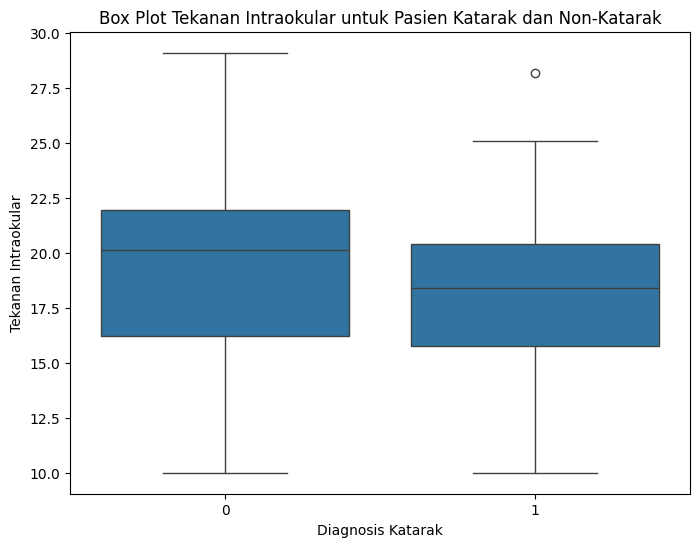

In [ ]:
# 5. Box Plot untuk Tekanan Intraokular
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='katarak', y='tekanan_intraokular')
plt.title('Box Plot Tekanan Intraokular untuk Pasien Katarak dan Non-Katarak')
plt.xlabel('Diagnosis Katarak')
plt.ylabel('Tekanan Intraokular')
plt.show()

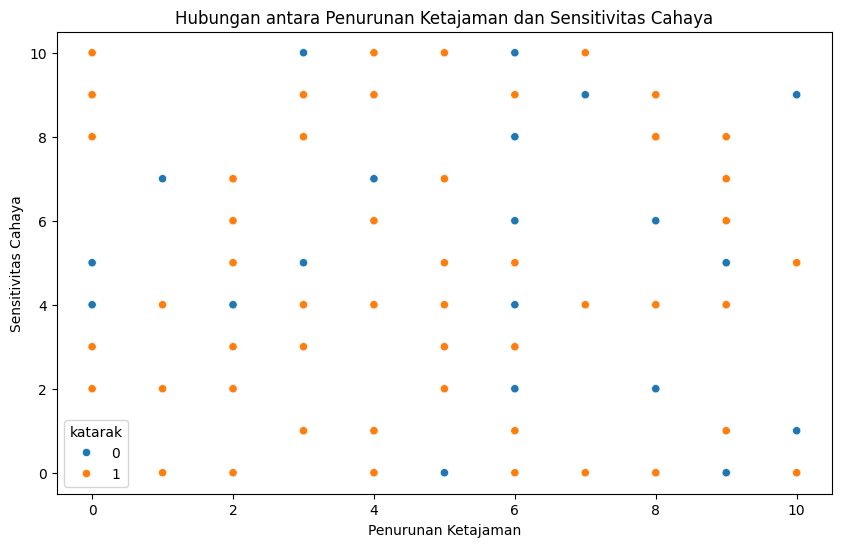

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='penurunan_ketajaman', y='sensitivitas_cahaya', hue='katarak')
plt.title('Hubungan antara Penurunan Ketajaman dan Sensitivitas Cahaya')
plt.xlabel('Penurunan Ketajaman')
plt.ylabel('Sensitivitas Cahaya')
plt.show()

# Analisis: Visualisasi ini menunjukkan apakah ada korelasi antara penurunan ketajaman penglihatan dan sensitivitas cahaya pada pasien katarak.

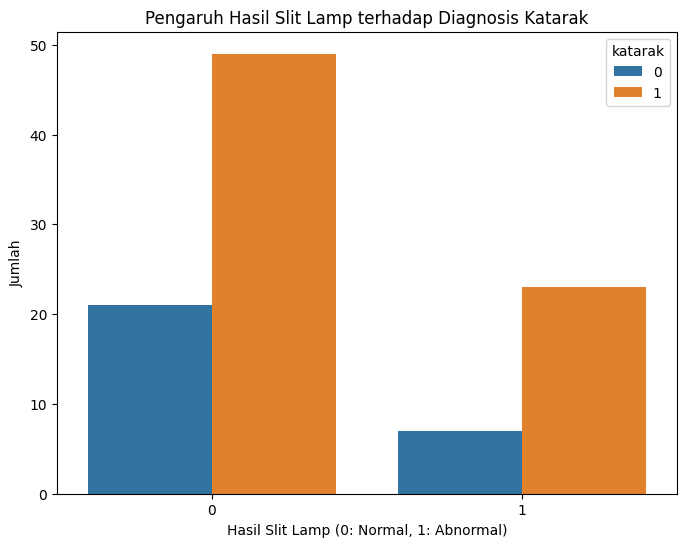

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='hasil_slitlamp', hue='katarak')
plt.title('Pengaruh Hasil Slit Lamp terhadap Diagnosis Katarak')
plt.xlabel('Hasil Slit Lamp (0: Normal, 1: Abnormal)')
plt.ylabel('Jumlah')
plt.show()

# Analisis: Menunjukkan bagaimana hasil pemeriksaan slit lamp berkorelasi dengan diagnosis katarak.

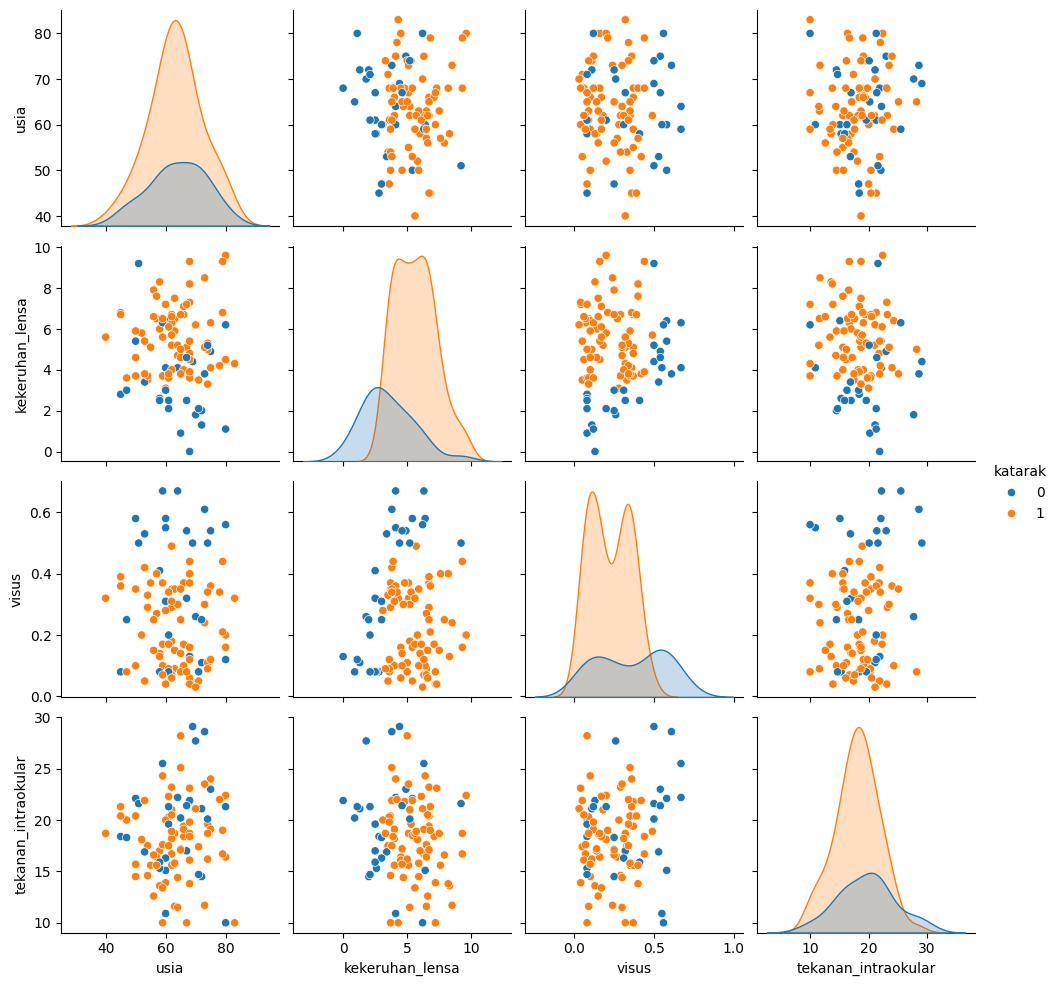

In [ ]:
sns.pairplot(df[['usia', 'kekeruhan_lensa', 'visus', 'tekanan_intraokular', 'katarak']], hue='katarak')
plt.show()

# Analisis: Pair plot memberikan gambaran umum tentang hubungan antara beberapa variabel numerik sekaligus, diwarnai berdasarkan diagnosis katarak.

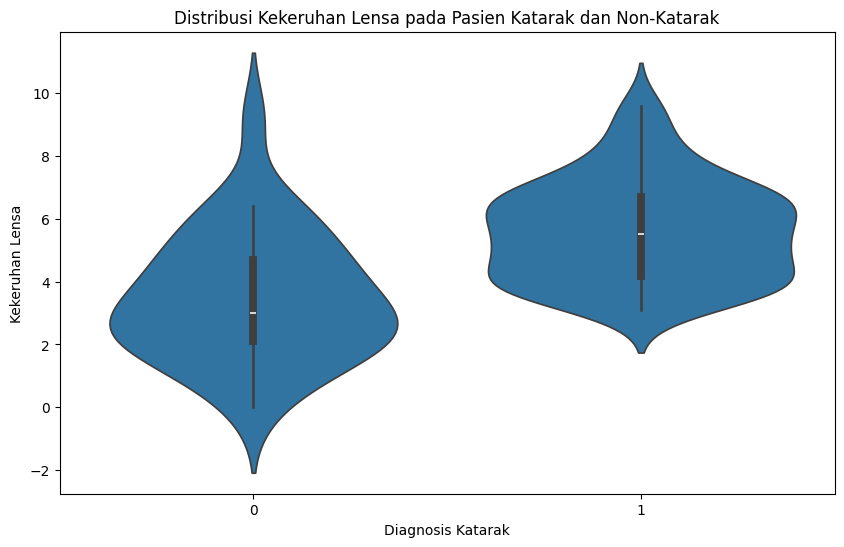

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='katarak', y='kekeruhan_lensa')
plt.title('Distribusi Kekeruhan Lensa pada Pasien Katarak dan Non-Katarak')
plt.xlabel('Diagnosis Katarak')
plt.ylabel('Kekeruhan Lensa')
plt.show()

# Analisis: Violin plot menggabungkan box plot dengan kernel density estimation, memberikan informasi lebih detail tentang distribusi data.

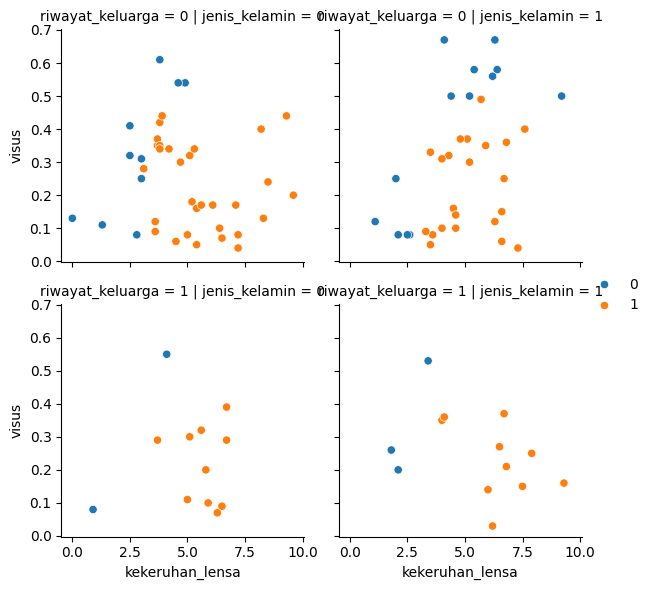

In [ ]:
g = sns.FacetGrid(df, col='jenis_kelamin', row='riwayat_keluarga')
g.map(sns.scatterplot, 'kekeruhan_lensa', 'visus', 'katarak')
g.add_legend()
plt.show()

# Analisis: Visualisasi ini membagi data berdasarkan jenis kelamin dan riwayat keluarga, kemudian menampilkan scatter plot untuk kekeruhan lensa dan visus, diwarnai berdasarkan diagnosis katarak.

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Parameter Terbaik: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Hasil Evaluasi Model:
Accuracy: 0.9500
Precision: 1.0000
Recall (Sensitivity): 0.9286
F1 Score: 0.9630
Specificity: 1.0000


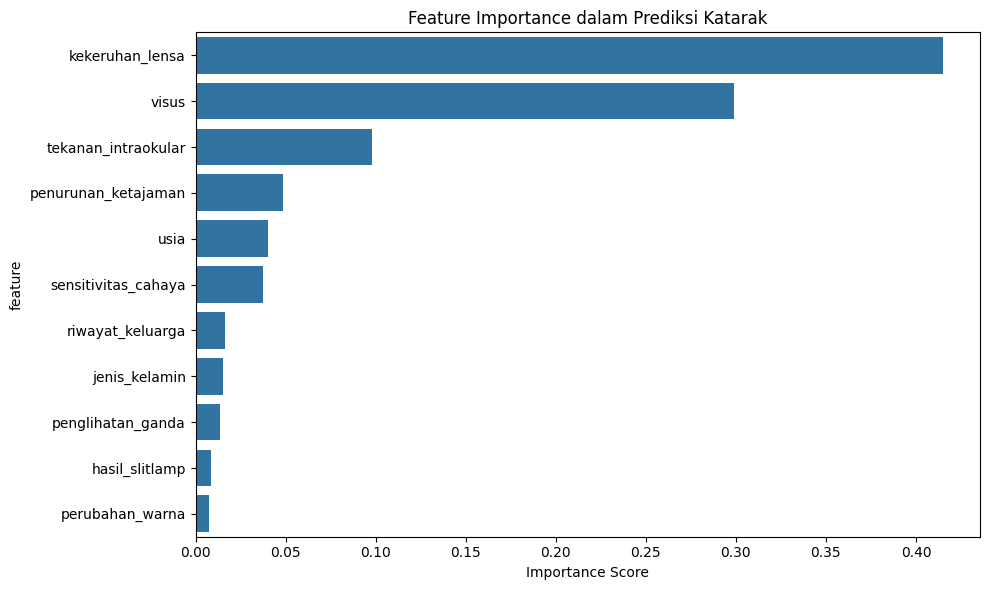

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# # Membaca dataset
# df = pd.read_csv('dataset_200.csv')

# Encode variabel kategorikal
le = LabelEncoder()
categorical_columns = ['jenis_kelamin', 'riwayat_keluarga', 'perubahan_warna',
                      'penglihatan_ganda', 'hasil_slitlamp', 'katarak']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Memisahkan fitur dan label
X = df.drop(columns='katarak')
y = df['katarak']

# Membagi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter grid untuk C4.5-like Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Jumlah pohon
    'max_depth': [None, 10, 20, 30],  # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],  # Minimum sampel untuk split
    'min_samples_leaf': [1, 2, 4],    # Minimum sampel di leaf
    'criterion': ['entropy'],          # Menggunakan entropy (C4.5) bukan gini
    'max_features': ['sqrt', 'log2'],  # Jumlah fitur yang dipertimbangkan
    'class_weight': ['balanced'],      # Menyeimbangkan kelas
    'bootstrap': [True],               # Menggunakan bootstrap sampling
}

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Melakukan Grid Search dengan cross-validation
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Melatih model dengan Grid Search
grid_search.fit(X_train, y_train)

# Mendapatkan parameter terbaik
best_params = grid_search.best_params_
print("\nParameter Terbaik:", best_params)

# Menggunakan model terbaik
best_model = grid_search.best_estimator_

# Memprediksi data uji
y_pred = best_model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Menghitung Sensitivity dan Specificity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Menampilkan hasil evaluasi
print("\nHasil Evaluasi Model:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")

# Visualisasi Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance dalam Prediksi Katarak')
plt.xlabel('Importance Score')
plt.tight_layout()


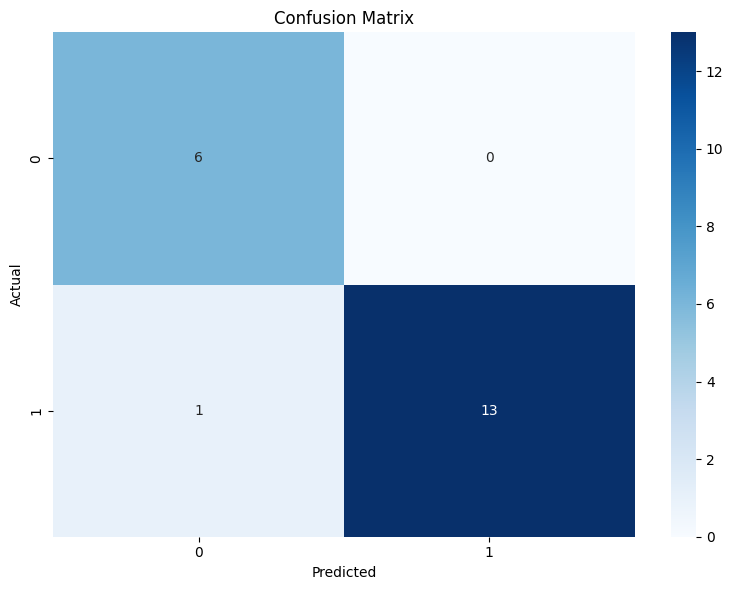

In [ ]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()

In [ ]:
# Menyimpan model
model_filename = 'FinalModel.joblib'
joblib.dump(best_model, model_filename)



['FinalModel.joblib']

In [ ]:
# Fungsi untuk prediksi baru
def predict_cataract(data_dict):
    # Mengubah input dictionary menjadi DataFrame
    input_df = pd.DataFrame([data_dict])

    # Melakukan encode pada variabel kategorikal
    for col in categorical_columns[:-1]:  # Tidak termasuk 'katarak'
        input_df[col] = le.fit_transform(input_df[col])

    # Melakukan prediksi
    prediction = best_model.predict(input_df)
    probability = best_model.predict_proba(input_df)

    return {
        'prediction': 'Katarak' if prediction[0] == 1 else 'Tidak Katarak',
        'probability': f"{max(probability[0]) * 100:.2f}%"
    }

# Contoh penggunaan fungsi prediksi
contoh_data = {
    'usia': 65,
    'jenis_kelamin': 'Pria',
    'riwayat_keluarga': 'Ya',
    'kekeruhan_lensa': 7.5,
    'penurunan_ketajaman': 8,
    'sensitivitas_cahaya': 7,
    'perubahan_warna': 'Ya',
    'penglihatan_ganda': 'Tidak',
    'tekanan_intraokular': 22.5,
    'hasil_slitlamp': 'Abnormal',
    'visus': 0.3
}

print("\nContoh Prediksi:")
hasil_prediksi = predict_cataract(contoh_data)
print(f"Hasil: {hasil_prediksi['prediction']}")
print(f"Probabilitas: {hasil_prediksi['probability']}")

print(f"\nModel telah disimpan sebagai '{model_filename}'")


Contoh Prediksi:
Hasil: Katarak
Probabilitas: 96.00%

Model telah disimpan sebagai 'FinalModel.joblib'
